First, the packages needed will be imported. the inline is for showcasing the graphs when runnin its cells.

# EE315 VHDL Project Group A

## Audio Sampling and Quantisation

This jupyter notebook showcases on a **step-by-step** structure, the main functionalities to create or open **.wav files**, listen to its track and output graphically its **waveforms and spectograms**. This code covers, the main digital signal processing fundamentals that revolve around audio processing and its characteristics. Thus, covering its frequencies, bandwidths, **sampling rates** and so on.

## 1) Import the adequate libraries for the processes shown below

In [2]:
import numpy as np
import scipy as sp
import scipy.signal as sg
import pandas as pd
import librosa
import wave
import matplotlib.pyplot as plt
%matplotlib inline

## 2) Uploading an audio file of a numpy array of 22kHz in frequency of mono type

In [3]:
import librosa
audio_data = 'C:\\Users\\USUARIO\\Downloads\\file_example_WAV_1MG.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
#<class 'numpy.ndarray'> <class 'int'>
print(x.shape, sr)
#(94316,) 22050


<class 'numpy.ndarray'> <class 'int'>
(739329,) 22050


#### Extra audio track which would consist of a different *sampling rate* to observe its effects on audio quality

In [4]:
audio_data2 = 'C:\\Users\\USUARIO\\Downloads\\file_example_WAV_1MG.wav'
x2 , sr2 = librosa.load(audio_data2)
print(type(x2), type(sr2))
#<class 'numpy.ndarray'> <class 'int'>
print(x2.shape, sr2)
#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>
(739329,) 22050


## 3) Resampling at 44.1KHz freq.

In [5]:
librosa.load(audio_data, sr=44100)

(array([-0.00137766, -0.00168072, -0.00202094, ..., -0.00691569,
        -0.00378694,  0.        ], dtype=float32),
 44100)

#### Same track resampled to 100 Hz

In [6]:
librosa.load(audio_data2, sr=100)

(array([-1.4580123e-04, -2.8158643e-04,  5.2672211e-05, ...,
        -1.1419877e-03, -2.2930822e-03,  0.0000000e+00], dtype=float32),
 100)

## 4) Displaying the audio track using the IPython module 

In [7]:
import IPython.display as ipd
ipd.Audio(audio_data)

In [8]:
import IPython.display as ipd
ipd.Audio(audio_data2)

## 5) Using matplotlib inline to show the audio waveform generated

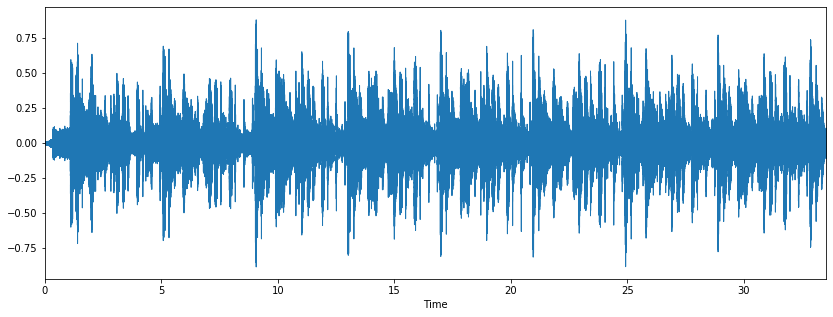

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#### Same waveform represented used for the audio with a sample rate of 100Hz

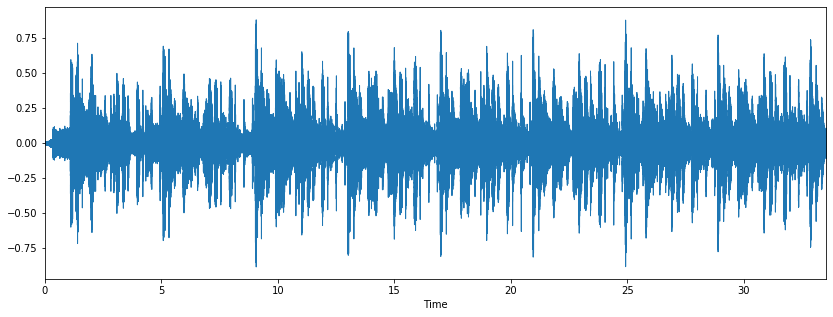

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x2, sr=sr)

## 6) Specshow used to represent the audio's spectogram

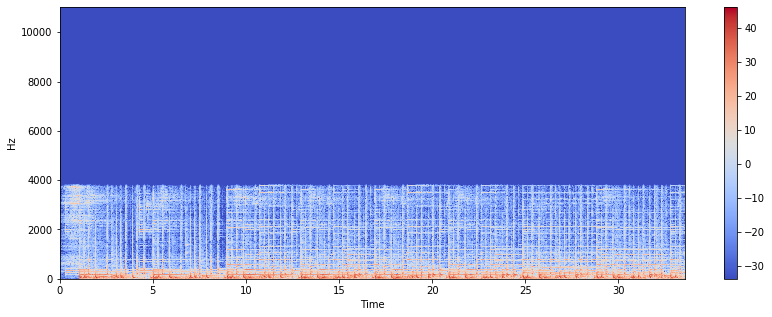

In [11]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

#### Then, it is changed the y_axis into logarithmic scale for ease of visualisation of the values

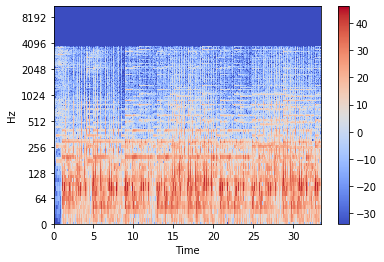

In [12]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## 7) Creating a sine wave to be played as a beeping sound

In [13]:
import numpy as np
sr = 22050 # sample rate (22.05 KHZ)
T = 5.0    # seconds   
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)


## 8) Using the wave module importing an audio file

In [73]:
import wave
wave.open('C:\\Users\\USUARIO\\Downloads\\file_example_WAV_1MG.wav', mode = 'wb')



## 9) Audio display class implemented using HTML5 (reference: Github)

In [69]:
from IPython.core.display import DisplayObject

class Audio(DisplayObject):
    def __init__(self, data=None, filename=None, url=None, embed=None, rate=None, autoplay=False):
        if filename is None and url is None and data is None:
            raise ValueError("No image data found. Expecting filename, url, or data.")
        if embed is False and url is None:
            raise ValueError("No url found. Expecting url when embed=False")
            
        if url is not None and embed is not True:
            self.embed = False
        else:
            self.embed = True
        self.autoplay = autoplay
        super(Audio, self).__init__(data=data, url=url, filename=filename)
            
        if self.data is not None and not isinstance(self.data, bytes):
            self.data = self._make_wav(data,rate)
            
    def reload(self):
        """Reload the raw data from file or URL."""
        import mimetypes
        if self.embed:
            super(Audio, self).reload()

        if self.filename is not None:
            self.mimetype = mimetypes.guess_type(self.filename)[0]
        elif self.url is not None:
            self.mimetype = mimetypes.guess_type(self.url)[0]
        else:
            self.mimetype = "audio/wav"
            
            
    def _make_wav(self,data,rate):
        """ Transform a numpy array to a PCM bytestring """
        import struct
        from io import BytesIO
        import wave
        maxabsvalue = max(map(abs,data))
        scaled = map(lambda x: int(x/maxabsvalue*32767), data)
        fp = BytesIO()
        waveobj = wave.open(fp,mode='wb')
        waveobj.setnchannels(1)
        waveobj.setframerate(rate)
        waveobj.setsampwidth(2)
        waveobj.setcomptype('NONE','NONE')
        waveobj.writeframes(b''.join([struct.pack('<h',x) for x in scaled]))
        val = fp.getvalue()
        waveobj.close()
        return val
    
    def _data_and_metadata(self):
        """shortcut for returning metadata with url information, if defined"""
        md = {}
        if self.url:
            md['url'] = self.url
        if md:
            return self.data, md
        else:
            return self.data
        
    def _repr_html_(self):
        src = """
                <audio controls="controls" {autoplay}>
                    <source src="{src}" type="{type}" />
                    Your browser does not support the audio element.
                </audio>
              """
        return src.format(src=self.src_attr(),type=self.mimetype, autoplay=self.autoplay_attr())

    def src_attr(self):
        import base64
        if self.embed and (self.data is not None):
                return """data:{type};base64,{base64}""".format(type=self.mimetype, 
                                                                base64=base64.b64encode(self.data).decode('ascii'))
        elif self.url is not None:
            return self.url
        else:
            return ""

    def autoplay_attr(self):
        if(self.autoplay):
            return 'autoplay="autoplay"'
        else:
            return ''

## 10) Setting a framerate (sampling rate "sr") of 44.1KHz 

In [70]:
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*440*np.sin(10*t**2))

## 11) Displaying the audio file

In [74]:
Audio(data,rate=framerate)

## 12) Autoplay functionality

In [75]:
Audio(data,rate=framerate, autoplay=True)

## 13) Attempt to plot the waveform signal, results are inconclusive

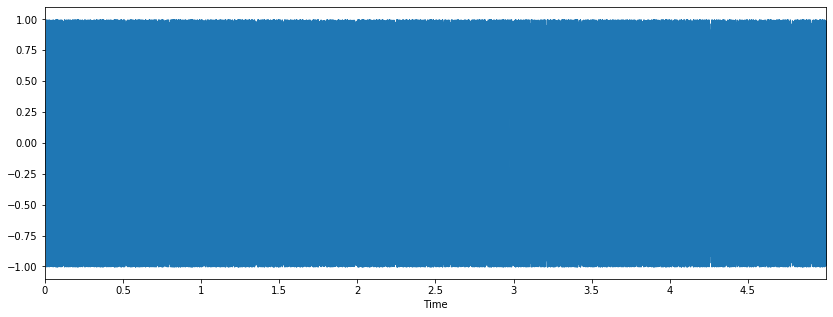

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data,framerate)

## 14) Finally, it is written the audio's channel (mono or stereo), framerate, amplitude width...

In [40]:
import wave
import struct
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
waveobj = wave.open("file_example_WAV_1MG.wav",mode='wb')
waveobj.setnchannels(1)
waveobj.setframerate(framerate)
waveobj.setsampwidth(2)
waveobj.setcomptype('NONE','NONE')
waveobj.writeframes(b''.join([struct.pack('<h',x) for x in scaled]))
waveobj.close()
